In [1]:
# aggr1 230 506 292 220 356 357 258 222 282 427 276 365 271 279 478 573 311 301

row_ctr = 0
latencies_1 = []
latencies_2 = []
for i in range(128):
    latencies_1.append([])
    latencies_2.append([])

latencies_mappish = []

with open("latency.txt", "r") as f:
    # read until the file ends
    while True:
        # read a single line
        line = f.readline()
        if not line:
            break
        # if the line is empty, break
        # split the line by spaces
        tokens = line.split()
        # the rest of the tokens are latencies
        latencies = [int(x) for x in tokens[1:]]
        if row_ctr % 2 == 0:
            for i in range(128):
                if not (i >= 1 and latencies[i] >= 250):
                    latencies_1[i].append(latencies[i])
                    latencies_mappish.append([i, latencies[i]])
        else:
            for i in range(128):
                if not (i >= 1 and latencies[i] >= 250):
                    latencies_2[i].append(latencies[i])

        if row_ctr > 1000:
            break 
        row_ctr += 1

# divide each sum_latency element by row_ctr/2

FileNotFoundError: [Errno 2] No such file or directory: 'latency.txt'

In [ ]:
# convert latencies_1 into pandas dataframe
import pandas as pd
df = pd.DataFrame(latencies_mappish)
df.columns = ['request', 'latency']
# rename requests larger than 0 to 'others'
df.loc[df['request'] > 0, 'request'] = 'others'

# randomly sample len(latencies_1[0]) entries from df where request is others and create a new df
df2 = df.loc[df['request'] == 'others'].sample(n=len(latencies_1[0]), random_state=1)

In [ ]:
df[df['request'] == 0]

,request,latency
0,0,240
127,0,682
190,0,242
316,0,234
443,0,221
...,...,...
62241,0,244
62367,0,248
62493,0,230
62619,0,236


In [ ]:
df.to_csv("check.csv")

Average latency for accesses to the first cache block 260.8483033932136
Average latency for accesses to other cache blocks 212.05189620758483


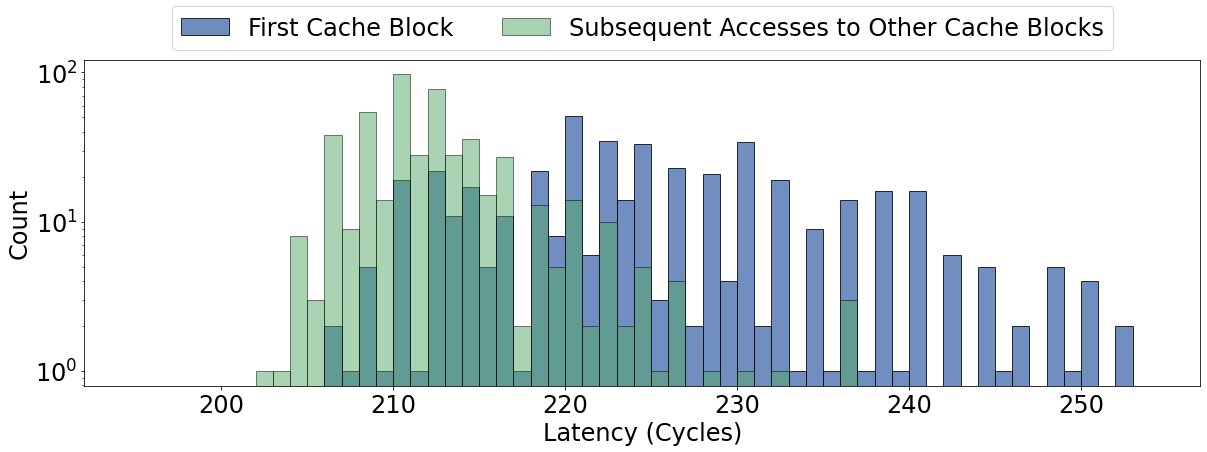

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

## draw figure for visual inspection purposes
plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = [20, 6]
plt.rcParams.update({'font.size': 24})
plt.yscale('log')
plt.hist(df.loc[df['request'] == 0, 'latency'], bins=range(195,255,1), linewidth = 1, alpha = 0.8, edgecolor = 'black')
plt.hist(df2.loc[df2['request'] == 'others', 'latency'], bins=range(195,255,1), linewidth = 1, alpha = 0.5, edgecolor = 'black')
plt.legend(['First Cache Block','Subsequent Accesses to Other Cache Blocks'],loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)
plt.xlabel("Latency (Cycles)")
plt.ylabel("Count")

# average latency where request is 0
print("Average latency for accesses to the first cache block", df.loc[(df['request'] == 0), 'latency'].mean())
# average latency where request is others
print("Average latency for accesses to other cache blocks", df2.loc[df2['request'] == 'others', 'latency'].mean())